In [1]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay


def plot_svm_decision_surface(clf, X, y, x_range=(-3, 3), y_range=(-3, 3), nlevels=50, eps=1, saveto=None):
    npoints = 500
    # Create a meshgrid to visualize the decision surface
    xgrid = np.linspace(*x_range, npoints)
    ygrid = np.linspace(*y_range, npoints)
    xx, yy = np.meshgrid(xgrid, ygrid)
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    Z_norm = Z / max(np.abs(Z.min()), np.abs(Z.max()))
    Z = Z_norm

    # Plot the decision surface and support vectors
    plt.contourf(
        xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm, levels=np.linspace(-1, 1, nlevels)
    )
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )

    # Plot the decision boundary and the margin boundaries
    ax = plt.gca()

    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
        ax=ax,
        grid_resolution=npoints,
        eps=eps,
    )

    if saveto:
        plt.savefig(saveto, dpi=300, bbox_inches="tight", pad_inches=0)

    plt.show()

# CIRCLES DATASET

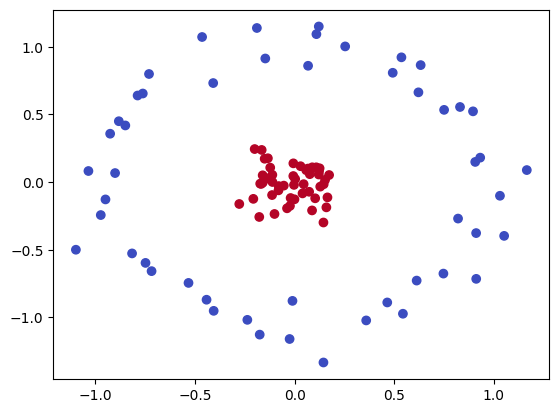

In [2]:
from sklearn.datasets import make_circles

# Generate a classification dataset with 1000 samples and 2 features
X, y = make_circles(n_samples=100, noise=0.1, factor=0.1, random_state=0)
y = y * 2 - 1

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)



Instantiate and fit an SVC model on the circles dataset.

- Which kernel did you choose?
- Why is it good?
- How other kernels you know would have fared?
- How important is, in this case, to find a good C parameter?

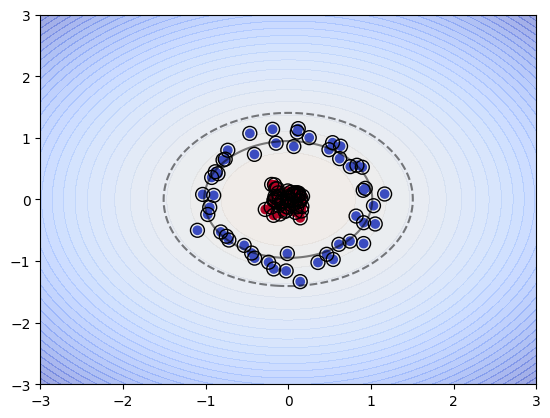

In [3]:

clf = svm.SVC(kernel="poly", degree=2, C=0.01)
clf.fit(X, y)

plot_svm_decision_surface(clf, X, y)

# MOONS Dataset

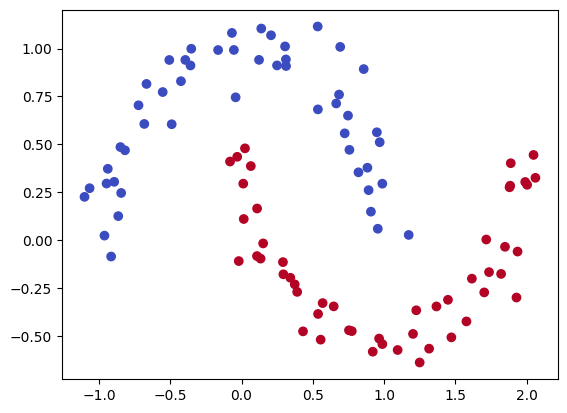

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

Instantiate and fit an SVC model on the moons dataset.

- Which kernel did you choose?
- Why is it good?
- How other kernels you know would have fared?
- How important is, in this case, to find a good C parameter?

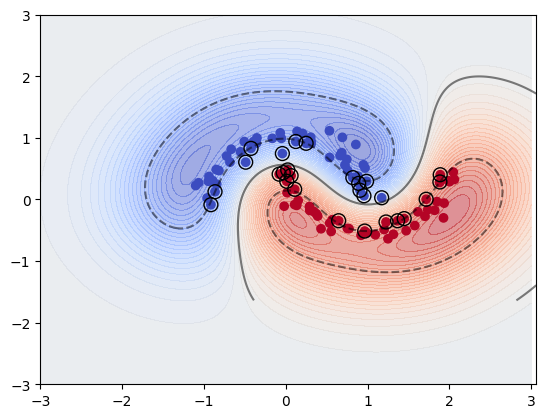

In [5]:

# Create SVM classifier with a non-linear kernel
clf = svm.SVC(kernel="rbf")

# Train the classifier on the dataset
clf.fit(X, y)

plot_svm_decision_surface(clf, X, y)

# CLASSIFICATION DATASET

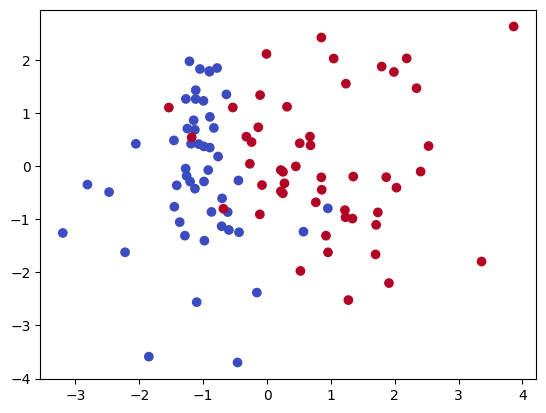

In [6]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=0)
y = y * 2 - 1

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)


Instantiate and fit an SVC model on the classification dataset.

- Which kernel did you choose?
- Why is it good?
- How other kernels you know would have fared?
- How important is, in this case, to find a good C parameter?

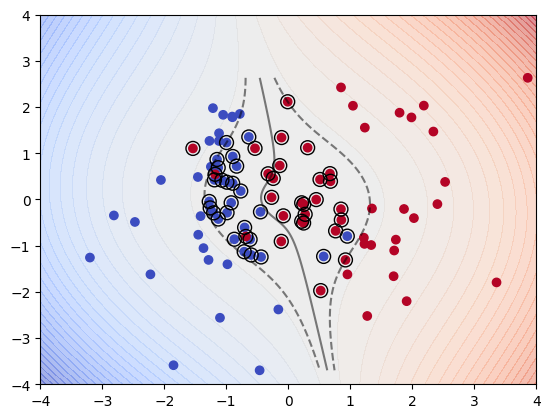

In [7]:
# Create SVM classifier with a non-linear kernel
clf = svm.SVC(kernel="poly", degree=3)

# Train the classifier on the dataset
clf.fit(X, y)

plot_svm_decision_surface(clf, X, y,eps=0, x_range=(-4,4), y_range=(-4,4))